# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [198]:
import numpy as np
import pandas as pd

In [113]:
df = pd.read_csv("rym_top5000.csv")

In [114]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [186]:
album_quantity = df.groupby("Artist Name").Album.agg("count")
df1 = df.merge(album_quantity, on = "Artist Name")
df1.rename(columns = {"Album_y":"Album_Quantity"}, inplace = True)
df1 = df1[df1.Album_Quantity > 5]

df1 = pd.DataFrame(df1.groupby(["Artist Name"])["Average Rating"].agg("median").sort_values(ascending=False))
df1.head(10)

,Average Rating
Artist Name,
David Bowie,4.050
The Beatles,4.045
King Crimson,3.970
The Rolling Stones,3.965
Black Sabbath,3.950
Led Zeppelin,3.940
Pink Floyd,3.910
Death,3.905
John Coltrane,3.905


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [288]:
rating_max = df.groupby("Artist Name")["Average Rating"].transform(max)
rating_min = df.groupby("Artist Name")["Average Rating"].transform(min)
df2 = pd.DataFrame({'Artist Name' : df['Artist Name'],
                    'Max Rating' : rating_max,
                    'Min Rating' : rating_min,
                    'Rating Amplitude' : rating_max - rating_min}).drop_duplicates()
df2 = df2.sort_values('Rating Amplitude', ascending=False)
df2.index = np.arange(1, len(df2)+1)
df2.head(10)

,Artist Name,Max Rating,Min Rating,Rating Amplitude
1,Kendrick Lamar,4.27,3.52,0.75
2,The Beatles,4.25,3.55,0.70
3,Pink Floyd,4.29,3.60,0.69
4,My Bloody Valentine,4.24,3.58,0.66
5,King Crimson,4.30,3.67,0.63
6,John Coltrane,4.30,3.70,0.60
7,Radiohead,4.23,3.66,0.57
8,Miles Davis,4.23,3.69,0.54
9,The Cure,4.17,3.63,0.54
10,Kanye West,4.07,3.54,0.53


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [224]:
%%capture --no-display
df["Number of Ratings"] = df["Number of Ratings"].str.replace(",","")
df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'])
df3 = df3[df3["Number of Ratings"]>=5000]
df3 = df[df["Number of Reviews"]>=15]
df3["Ratio"] = round(df3["Number of Ratings"]/df3["Number of Reviews"],2)
df3 = df3.sort_values("Ratio", ascending=False)
df3 = df3[["Album", "Ratio"]]
df3.index = np.arange(1, len(df3)+1)
df3.head(10)

,Album,Ratio
1,Jenny Death: The Powers That B Disc 2,361.83
2,Bury Me at Makeout Creek,308.21
3,春と修羅 (Haru to Shura),272.91
4,Saturation,251.84
5,Saturation III,251.74
6,Scenery,248.67
7,Endless,228.49
8,Imperial,225.42
9,Saturation II,215.55
10,Bottomless Pit,202.10


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [232]:
%%capture --no-display
df["Year"] = df["Release Date"].str.extract('(\d{4})', expand=True)
# a)
review_threshold = df["Number of Reviews"].quantile(0.75)
df4a = df[df["Number of Reviews"] > review_threshold]
df4a = pd.DataFrame(df4a.groupby("Year").Album.agg("count").sort_values(ascending=False))
df4a.head(5)

,Album
Year,
1970,43
1971,41
1969,38
1994,36
1995,34


In [231]:
# b)
rate_threshold = df["Number of Ratings"].quantile(0.75)
df4b = df[df["Number of Ratings"] > rate_threshold]
df4b = pd.DataFrame(df4b.groupby("Year").Album.agg("count").sort_values(ascending=False))
df4b.head(5)

,Album
Year,
1994,41
1971,36
1970,35
1996,34
1995,33


## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

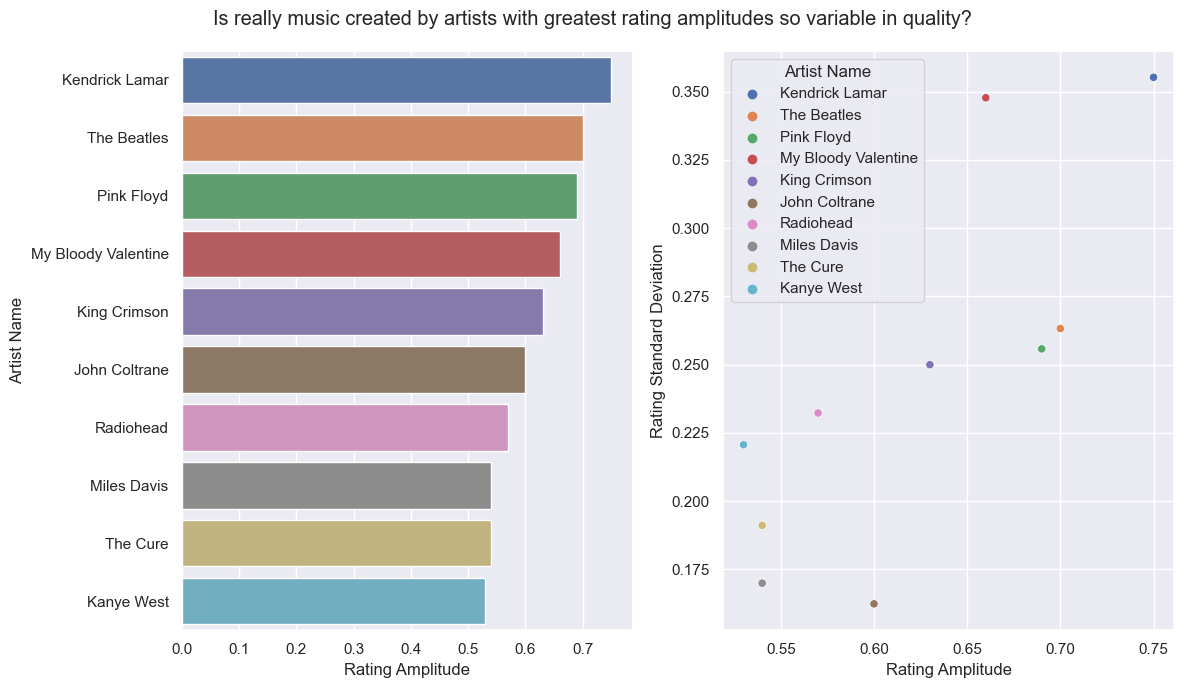

In [310]:
%%capture --no-display
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

fig, ax = plt.subplots(1,2)
data1 = df2.head(10)
fig1 = sns.barplot(data=data1,
                   x='Rating Amplitude',
                   y='Artist Name',
                   ax=ax[0])

data2 = df.groupby("Artist Name")["Average Rating"].std().sort_values(ascending=False)
data2 = data1.merge(data2, on = "Artist Name")
data2.rename(columns = {"Average Rating":"Rating Standard Deviation"}, inplace = True)
fig2 = sns.scatterplot(data=data2,
                       x="Rating Amplitude",
                       y="Rating Standard Deviation",
                       hue="Artist Name",
                       ax=ax[1])
fig.suptitle("Is really music created by artists with greatest rating amplitudes so variable in quality?")
plt.tight_layout()

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 

In [311]:
plt.savefig('amplitude.pgf')

<Figure size 1200x700 with 0 Axes>